# Cardiovascular Disease Prediction

# Import libraries
Let's first import all the necessary libraries. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib, use rcParams to add styling to the plots and rainbow for colors. For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

For processing the data, I'll import a few libraries. To split the available dataset for testing and training, I'll use the train_test_split method. To scale the features, I am using StandardScaler.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import dataset

Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file dataset.csv. I'll use the pandas read_csv method to read the dataset.

In [6]:
dataset = pd.read_csv('y1.csv')

The dataset is now loaded into the variable dataset. I'll just take a glimpse of the data using the desribe() and info() methods before I actually start processing and visualizing it.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
age           303 non-null int64
sex           303 non-null int64
bc            303 non-null int64
bp            303 non-null int64
hereditary    303 non-null int64
smoking       303 non-null int64
alchol        303 non-null int64
exericise     303 non-null int64
diabetes      303 non-null int64
diet          303 non-null int64
obesity       303 non-null int64
stress        303 non-null int64
hd            303 non-null int64
dtypes: int64(13)
memory usage: 30.9 KB


Looks like the dataset has a total of 303 rows and there are no missing values. There are a total of 13 features along with one target value which we wish to find.

In [8]:
dataset.describe()

,age,sex,bc,bp,hereditary,smoking,alchol,exericise,diabetes,diet,obesity,stress,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,220.808581,126.072607,0.551155,0.620462,0.570957,0.537954,0.518152,0.478548,0.504950,0.402640,0.544554
std,9.082101,0.466011,17.760446,12.327808,0.498199,0.486075,0.495758,0.499382,0.500497,0.500366,0.500803,0.491241,0.498835
min,29.000000,0.000000,191.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,205.000000,118.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,222.000000,125.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,61.000000,1.000000,236.000000,133.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,250.000000,247.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



The scale of each feature column is different and quite varied as well. While the maximum for age reaches 77, the maximum of bc (blood cholestoral) is 250.

# Understanding the data

Now, we can use visualizations to better understand our data and then look at any processing we might want to do

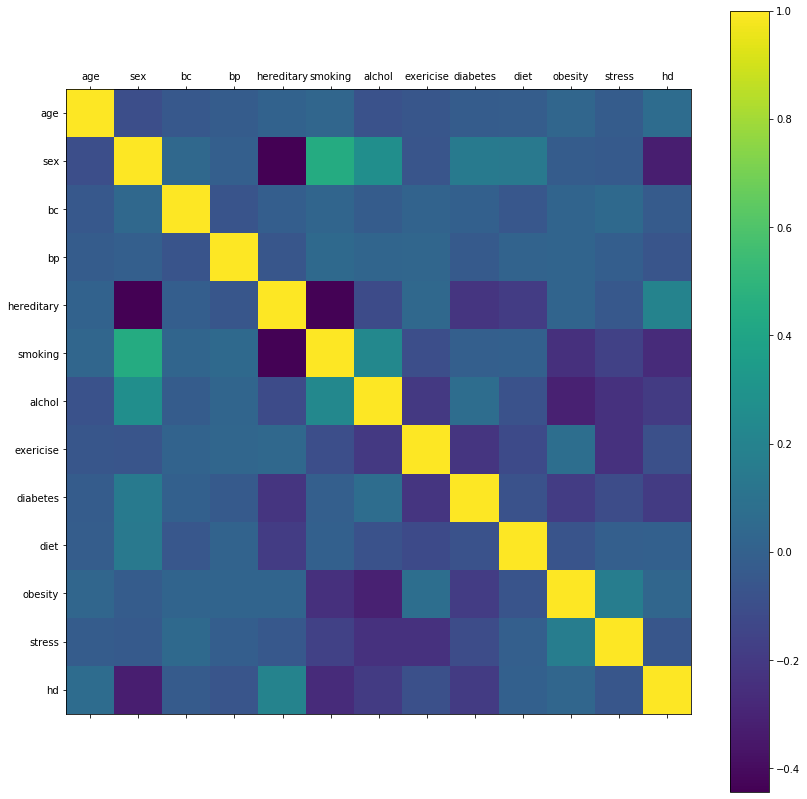

In [9]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

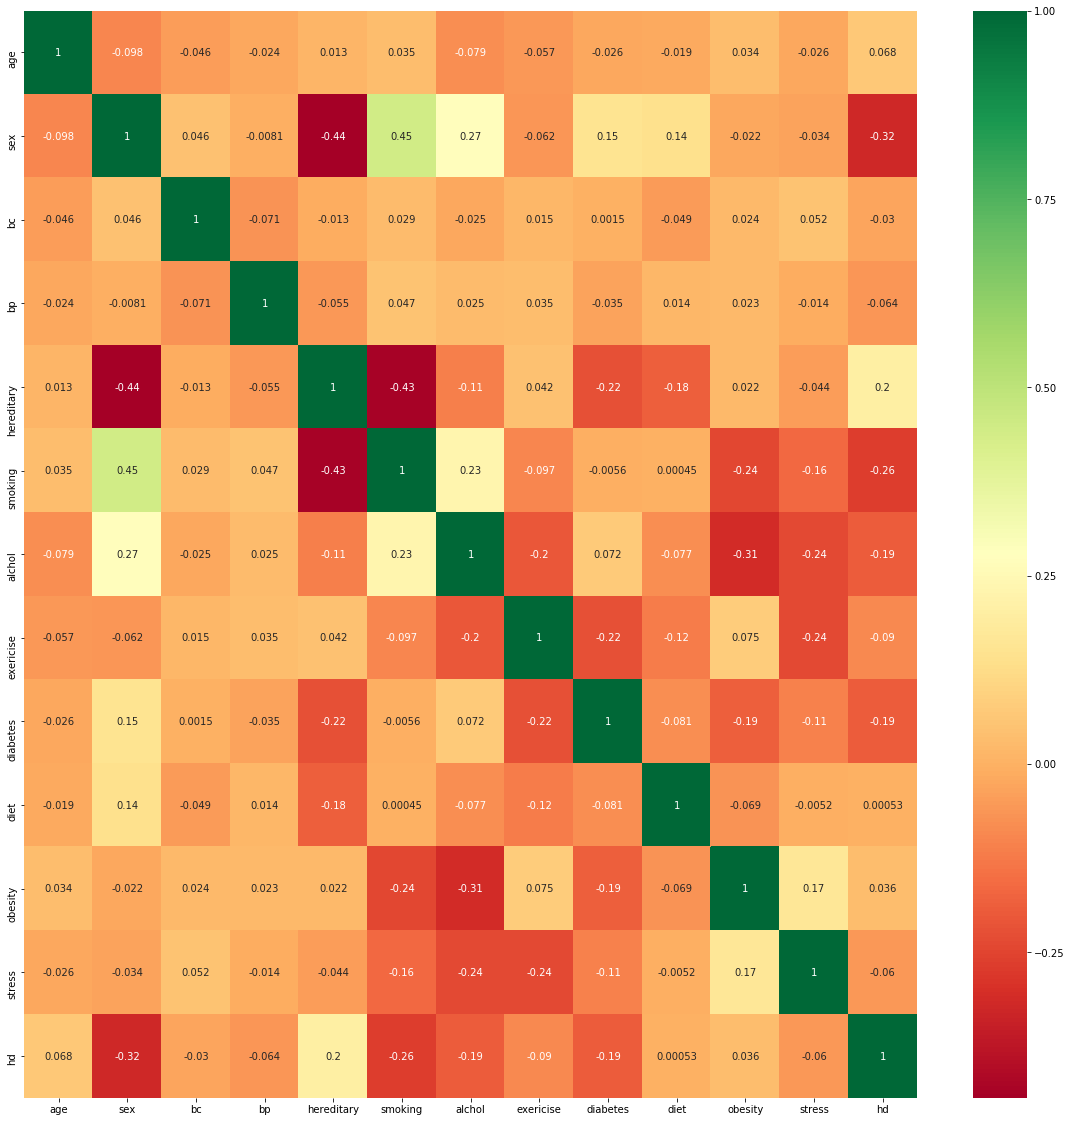

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive. Next, I'll take a look at the histograms for each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE45804C18>,
      dtype=object)

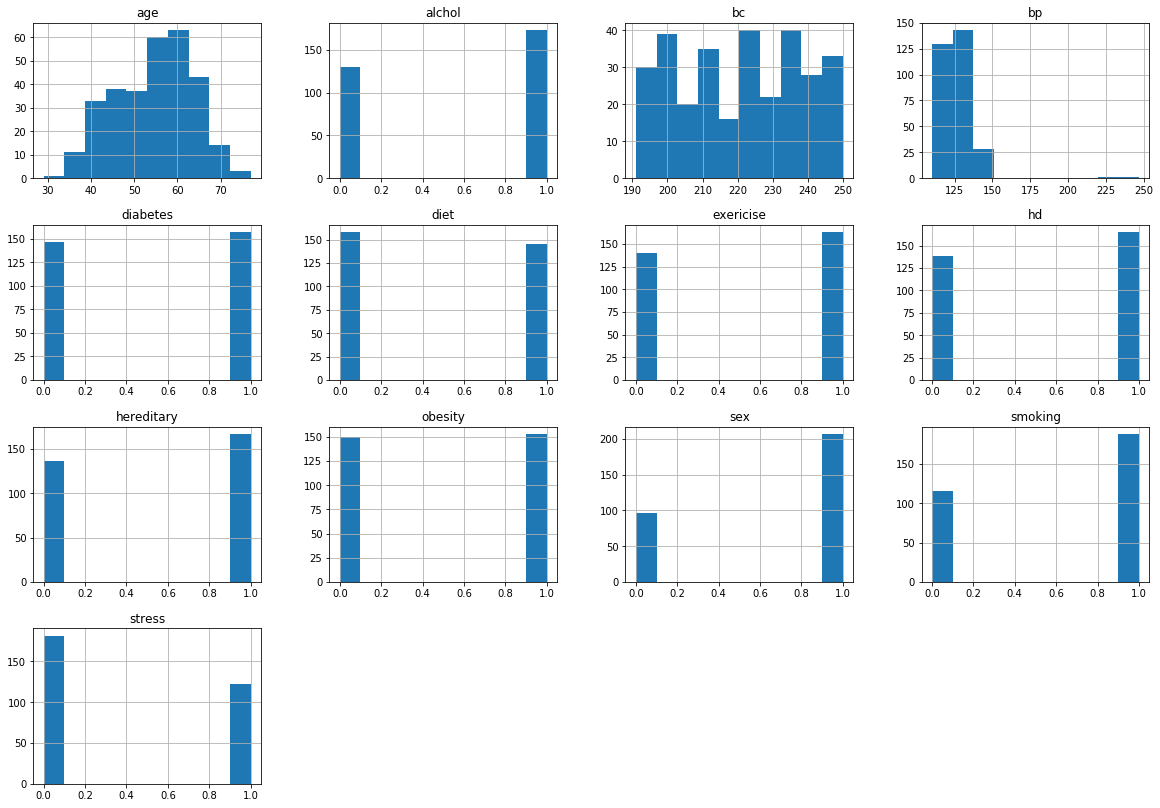

In [11]:
dataset.hist()


Taking a look at the histograms above, I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

Text(0.5, 1.0, 'Count of each Target Class')

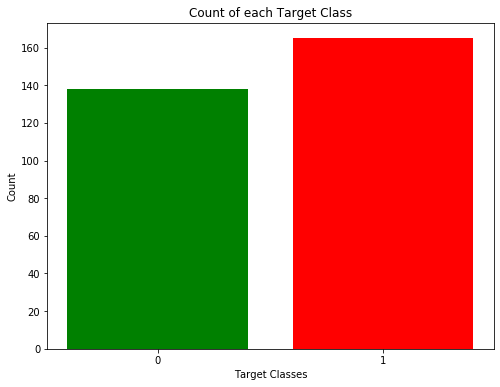

In [12]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['hd'].unique(), dataset['hd'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

# Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [13]:

dataset = pd.get_dummies(dataset, columns = ['sex', 'hereditary', 'smoking', 'alchol', 'exericise', 'diabetes', 'diet', 'obesity', 'stress'])

Now, I will use the StandardScaler from sklearn to scale my dataset

In [14]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'bc', 'bp']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

# Machine Learning

I'll now import train_test_split to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.

In [15]:
y = dataset['hd']
X = dataset.drop(['hd'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

# K Neighbors Classifier

The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score

In [16]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))


I have the scores for different neighbor values in the array knn_scores. I'll now plot it and see for which value of K did I get the best scores.

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

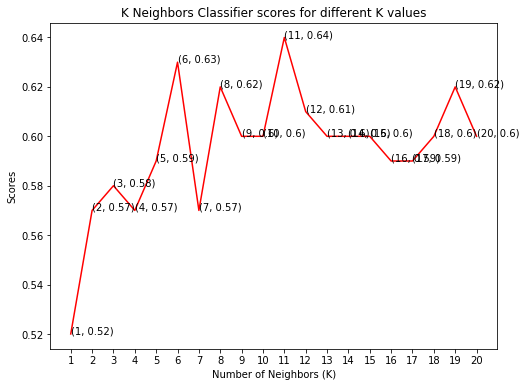

In [17]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the plot above, it is clear that the maximum score achieved was 0.64 for the 11 neighbors.

In [49]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[10]*100, 11))

The score for K Neighbors Classifier is 64.0% with 11 nieghbors.


# Support Vector Classifier

There are several kernels for Support Vector Classifier. I'll test some of them and check which has the best score.

In [19]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

I'll now plot a bar plot of scores for each kernel and see which performed the best.

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

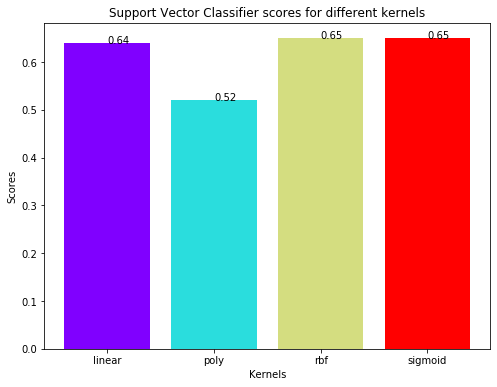

In [20]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

The rbf and sigmoid kernel performed same.

In [48]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[2]*100, 'rbf'))

The score for Support Vector Classifier is 65.0% with rbf kernel.


# Decision Tree Classifier

Here, I'll use the Decision Tree Classifier to model the problem at hand. I'll vary between a set of max_features and see which returns the best accuracy.

In [30]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

I selected the maximum number of features from 1 to 30 for split. Now, let's see the scores for each of those cases.

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

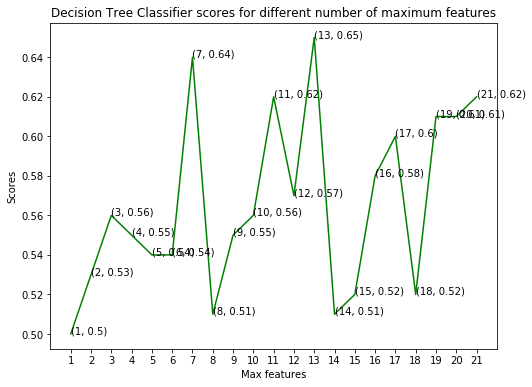

In [31]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

The model achieved the best accuracy at three values of maximum feature 8.



In [45]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[12]*100, [8]))

The score for Decision Tree Classifier is 65.0% with [8] maximum features.


# Random Forest Classifier

Now, I'll use the ensemble method, Random Forest Classifier, to create the model and vary the number of estimators to see their effect.

In [36]:

rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

The model is trained and the scores are recorded. Let's plot a bar plot to compare the scores.



Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

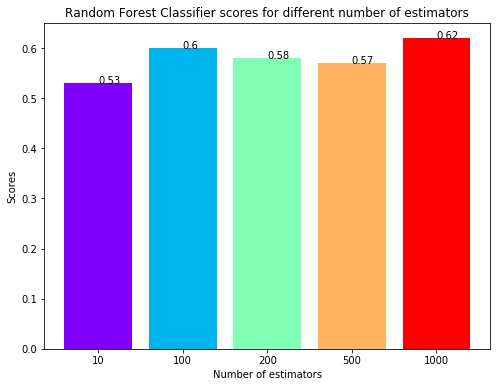

In [37]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

The maximum score is achieved when the total estimator is 1000.

In [41]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[4]*100, [1000]))

The score for Random Forest Classifier is 62.0% with [1000] estimators.


# LogisticRegression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr = LogisticRegression(random_state=2, solver='lbfgs', max_iter=1500) #Parameters added to disable warnings

print('CV score:', cross_val_score(lr, X_test, y_test, cv = 3).mean())

CV score: 0.6304218657159834


In [80]:
lr_best_grid = lr_grid_search.best_estimator_
lr_best_grid # Note that it's a classifier

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=2, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
print('The score for LogisticRegression Classifier is :', cross_val_score(lr_best_grid, X_test, y_test, cv = 3).mean())

The score for LogisticRegression Classifier is : 0.6500297088532383


# Conclusion

In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, I analysed it using plots. Then, I did generated dummy variables for categorical features and scaled other features. I then applied four Machine Learning algorithms, K Neighbors Classifier, Support Vector Classifier, Decision Tree Classifier and Random Forest Classifier. I varied parameters across each model to improve their scores. In the end, Support Vector Classifier and LogisticRegression achieved the highest score of 65%.